# Project

Machine Learning and Statistics

winter 23/24

Jamie Roche
***

### Supervised learning Vs Unsupervised learning

https://www.ibm.com/blog/supervised-vs-unsupervised-learning/

Supervised learning is where the algorithms learn based of human labelled training sets of data. 
The algorithm iterates through the data set making predictions based on the labelled initial training data sets.
Making changes to the algorithm to ensure the correct predictions are made.  
This requires initial set up by the creator of the algorithms, labelling data and splitting them for training and testing.

Unsupervised learning is where the algorithm does not have initial labelled data and must work through the dataset to determine the structure. 

Supervised learning typically performs better over unsupervised learning, but does require initial assistance from the creator to provide labelled training and testing data sets.


### Classification Algorithms
https://www.datacamp.com/blog/classification-machine-learning#
https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning

Classification algorithms are algorithms that use the supervised machine learning technique.
The model is trained using a training data set. This trained model then is tested against a test data set to determine how accurate the model is. 

When training and testing is complete the algorithm can then classify new unknown pieces of data to their respective category or class. 

Classification algorithms use patterns to sort data in to specified classes, or categories. 



### K-Nearest Neighbors Algorithm

https://www.ibm.com/topics/knn
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

K nearest neighbours’ classifier is a supervised learning technique, KNN uses the closeness of a data point to the trained model to classify the data point in the specifies class or categories. 

The KNN model takes the K number of points around the data to categorise the data point into an existing class. 
The default value for 5 in SciKit learn package is 5, for instance the data would be compared to the 5 closest points in the training model and categorised the same as whichever class as that most points closest to the model. 

It is advisable to have k set to a number that in not divisible by the number of classes to prevent a tie in number of closest points to the new data point, as the class which has the closest points will be the point at which the data point is categorised into. 

KNN uses the Euclidean distance to determine how close a point is to the nearest points. 
The Euclidean distance is the measure of the straight line from the existing point to the new data point. 

The formula for Euclidean distance:


$$ d(x,y)= \sqrt {\sum _{i=1}^n(y_i-x_i)^2} $$






### Naïve Bayes classifiers

https://www.ibm.com/topics/naive-bayes

https://www.geeksforgeeks.org/naive-bayes-classifiers/

https://en.wikipedia.org/wiki/Bayes%27_theorem

Naïve Bayes classifier is a supervised machine learning algorithm. This classifier is based on Bayes theorem.
This theorem uses the ability to invert conditional probabilities, where the occurrence of an event has an impact on the probability of another event occurring. 

Formula for Bayes' Theorem:
$$ P(A|B)= \frac {P(B|A)P(A)}{P(B)} $$

As the classifiers hosts initial assumptions, it is called Naïve.

The Classifier assumes all characteristics are independent to other characteristics in the classifier. 
It assumes characteristics carry the same weight when it comes to classifying data points. 

For the Iris Data set the assumption the characteristics are unrelated may not be true in reality, as there is a correlation between widths and lengths of sepals and petals. 


### J48 (Decision Tree Classification)

https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e
https://towardsdatascience.com/what-is-the-c4-5-algorithm-and-how-does-it-work-2b971a9e7db0

J48 is a classification that uses decision trees to build the model based on the training data provided to the classifier. 
J48 is based on the C4.5 decision tree algorithm. The classifier creates a decision tree based on the provided training data, then categorises the new data points based on the decisions of the decision tree to classify the data in the the respective classes. 


### Exploring Classification Algorithms 

In [1]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import sklearn.decomposition as dec
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.naive_bayes as NB
import sklearn.tree as DT


In [2]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


df = pd.read_csv(url,sep=',',encoding='utf-8',)
df_NoNA = df.dropna()
df_NoNA

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Create sub data frames of each speices 
IrisSetosaGroup = df_NoNA[df_NoNA["species"].isin(['setosa'])]

In [4]:
IrisVersicolorGroup = df_NoNA[df_NoNA["species"].isin(['versicolor'])]

In [5]:
IrisVirginicaGroup = df_NoNA[df_NoNA["species"].isin(['virginica'])]

### Create histograms of individual species

Create individual histograms of species of the Iris plants based on different parameters. 
To determine the best variable to preform classification on. 
Based on the below histograms, figs 1.1 - 1.4, it can be seen that the petal length and width have the least overlap of the categorising data. There is quite a lot of overlap between all species when it comes to sepal length and width.


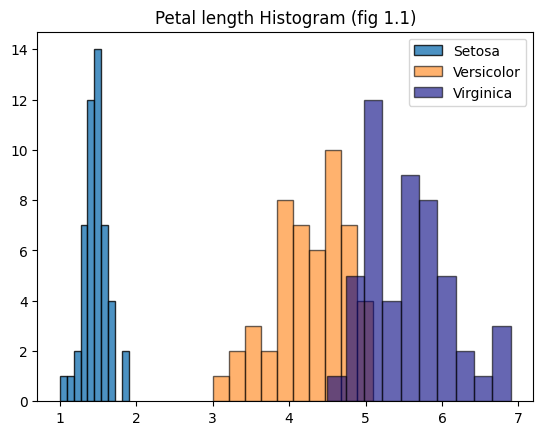

In [6]:
plt.hist(IrisSetosaGroup['petal_length'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['petal_length'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['petal_length'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Petal length Histogram (fig 1.1)')
plt.show() 

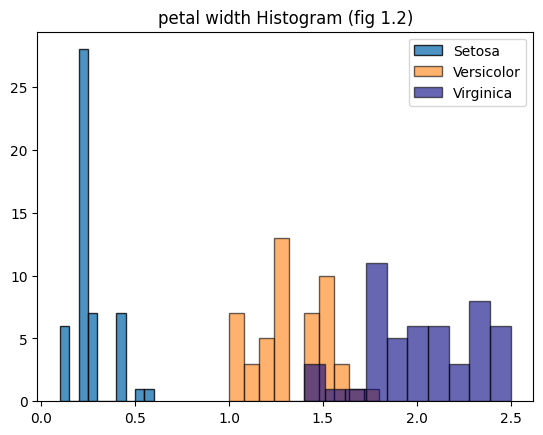

In [7]:
plt.hist(IrisSetosaGroup['petal_width'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['petal_width'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['petal_width'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('petal width Histogram (fig 1.2)')
plt.show() 

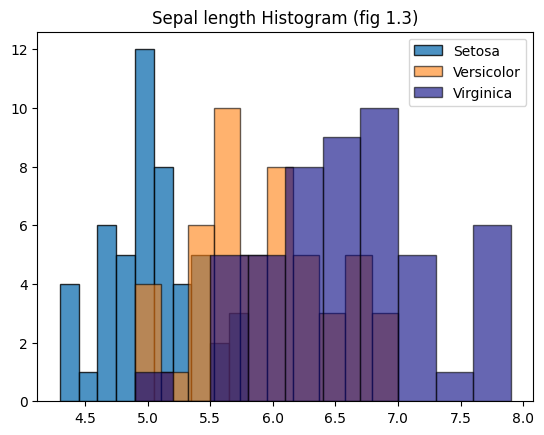

In [8]:
plt.hist(IrisSetosaGroup['sepal_length'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['sepal_length'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['sepal_length'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Sepal length Histogram (fig 1.3)')
plt.show() 

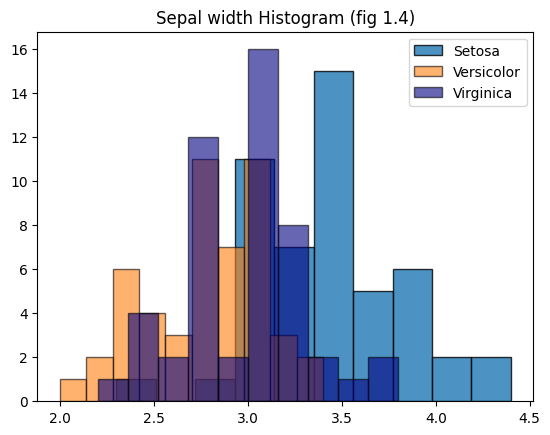

In [9]:
plt.hist(IrisSetosaGroup['sepal_width'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['sepal_width'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['sepal_width'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Sepal width Histogram (fig 1.4)')
plt.show() 

### Perform nearest neighbor classification on the data based on mulitple variations of selected data. 
The first classification is done based on sepal length and width. 
The second is done on petal length and width.
The third is done using scaled data and using Principal component analysis to minimise the data to two dimensions for better readability. 
The final nearest neighbour classification is done using Principal component analysis without scaling. 


In [10]:
clf = KNeighborsClassifier()

X1 = df_NoNA[['sepal_length','sepal_width']]
X2 =df_NoNA[['petal_length','petal_width']]

In [11]:
Y=df_NoNA['species']

In [12]:
sumOutX1 = 0
for k in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.33) 

    clf.fit(X_train,y_train)

    res = clf.predict(X_test) == y_test
    sumOutX1= sumOutX1 + np.sum(res)
resX1 = (sumOutX1/(len(y_test)*100))*100

print("Percenatge result of KNN averaged over 100 runs for sepal length and width with a test size of .333: " + str(resX1) + " %")

Percenatge result of KNN averaged over 100 runs for sepal length and width with a test size of .333: 75.72 %


In [13]:
cross_val_score(clf,X1,Y,cv=5)

array([0.73333333, 0.73333333, 0.76666667, 0.83333333, 0.73333333])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


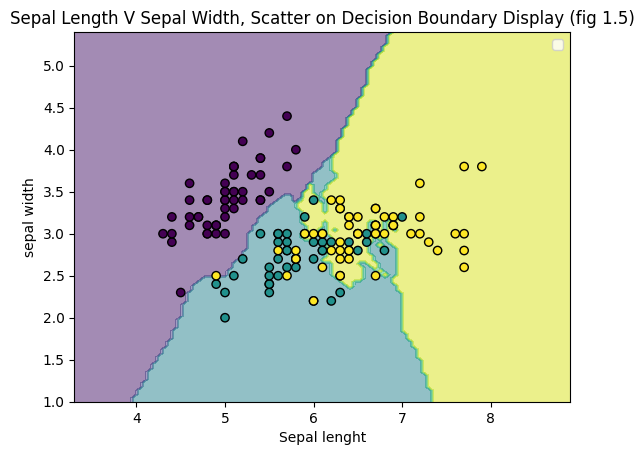

In [14]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X1, response_method="predict",
    xlabel="Sepal lenght", ylabel="sepal width",
    alpha=0.5,
)
disp.ax_.scatter(X1['sepal_length'], X1['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('Sepal Length V Sepal Width, Scatter on Decision Boundary Display (fig 1.5)')
plt.show()

In [15]:
sumOutX2 = 0
for k in range(100):
    X2_train,X2_test,y2_train,y2_test = train_test_split(X2,Y,test_size=0.33)

    clf.fit(X2_train,y2_train)

    res2 = clf.predict(X2_test) == y2_test
    sumOutX2= sumOutX2 + np.sum(res2)
resX2 = (sumOutX2/(len(y2_test)*100))*100

print("Percenatge result of KNN averaged over 100 runs for petal length and width with a test size of .333: " + str(resX2) + " %")

Percenatge result of KNN averaged over 100 runs for petal length and width with a test size of .333: 96.32 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


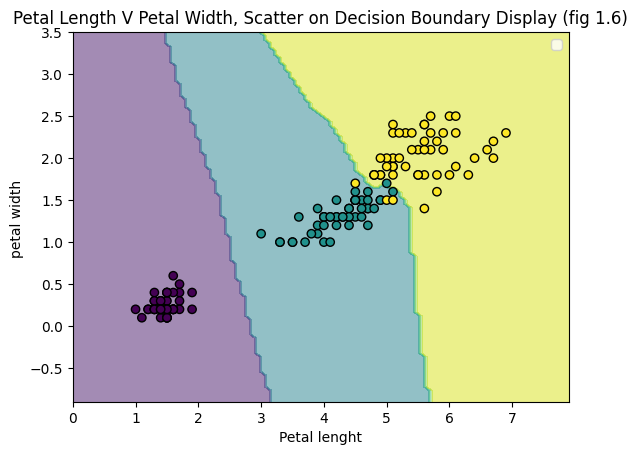

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X2, response_method="predict",
    xlabel="Petal lenght", ylabel="petal width ",
    alpha=0.5,
)
disp.ax_.scatter(X2['petal_length'], X2['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('Petal Length V Petal Width, Scatter on Decision Boundary Display (fig 1.6)')
plt.show()

In [17]:
pca = dec.PCA(n_components=2)

x = df_NoNA[['sepal_length', 'sepal_width', 'petal_length',  'petal_width']]
scaler = StandardScaler()

scaler.fit(x)

StandardScaler()

In [18]:
x_transform = scaler.transform(x)

TDF = pd.DataFrame(x_transform, columns=['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

pca.fit(TDF)

x_pca = pca.transform(TDF)

df_pca = pd.DataFrame(df[["species"]])
df_pca["pca0"] = x_pca[:,0]
df_pca["pca1"] = x_pca[:,1]

Text(0.5, 1.05, 'Pair Plot of Principal component analysis Fig. 1.7')

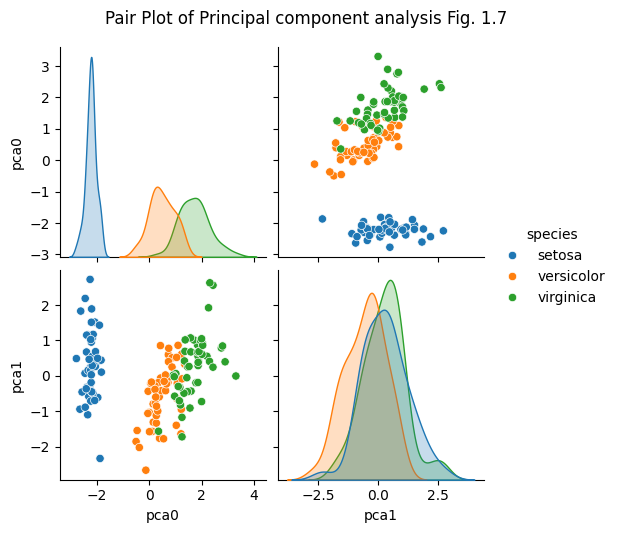

In [19]:
# https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid


g = sns.pairplot(df_pca,hue = "species")
g.fig.suptitle("Pair Plot of Principal component analysis Fig. 1.7",y=1.05)

In [20]:
clfpca = KNeighborsClassifier()

Xpca = df_pca[['pca0','pca1']]

In [21]:
Ypca=df_pca['species']

In [22]:
sumOutXpca = 0
for k in range(100):
    Xpca_train,Xpca_test,ypca_train,ypca_test = train_test_split(Xpca,Ypca,test_size=0.33) 

    clfpca.fit(Xpca_train,ypca_train)

    res3 = clfpca.predict(Xpca_test) == ypca_test
    sumOutXpca= sumOutXpca + np.sum(res3)
resXpca = (sumOutXpca/(len(ypca_test)*100))*100

print("Percenatge result of KNN averaged over 100 runs for Scaled data with Principle Component Analysis an with a test size of .333: " + str(resXpca) + " %")


Percenatge result of KNN averaged over 100 runs for Scaled data with Principle Component Analysis an with a test size of .333: 90.84 %


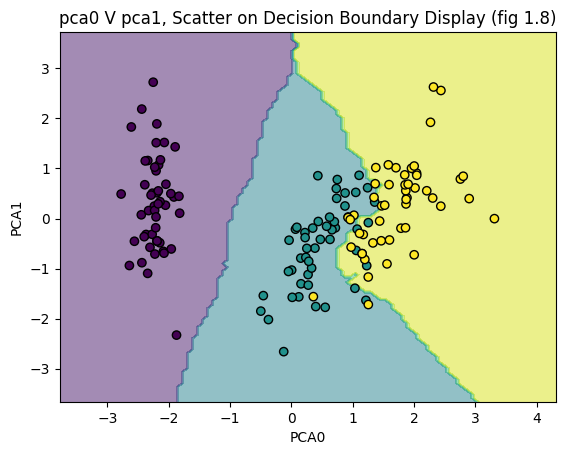

In [23]:
disp = DecisionBoundaryDisplay.from_estimator(
    clfpca, Xpca, response_method="predict",
    xlabel="PCA0", ylabel="PCA1",
    alpha=0.5,
)
disp.ax_.scatter(Xpca['pca0'], Xpca['pca1'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.title('pca0 V pca1, Scatter on Decision Boundary Display (fig 1.8)')
plt.show()

In [24]:
pcaNS = dec.PCA(n_components=2)


In [25]:
xNS = pd.DataFrame(df, columns=['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

pcaNS.fit(xNS)

x_pca = pca.transform(xNS)

df_pcaNS = pd.DataFrame(df[["species"]])
df_pcaNS["pca0NS"] = x_pca[:,0]
df_pcaNS["pca1NS"] = x_pca[:,1]

Text(0.5, 1.05, 'Pair Plot of Principal component analysis Without Scaling Fig. 1.9')

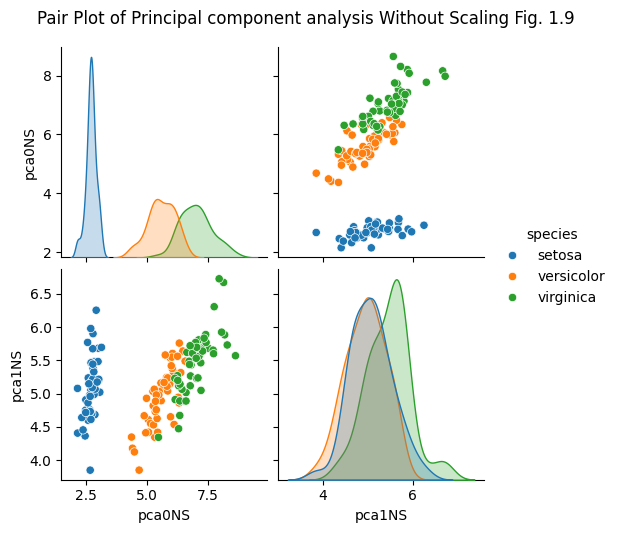

In [26]:
# https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid


g1 = sns.pairplot(df_pcaNS,hue = "species")
g1.fig.suptitle("Pair Plot of Principal component analysis Without Scaling Fig. 1.9",y=1.05)

In [27]:
df_pcaNS

clfpcaNS = KNeighborsClassifier()

XpcaNS = df_pcaNS[['pca0NS','pca1NS']]

In [28]:
YpcaNS=df_pcaNS['species']

In [29]:
sumOutXpcaNS = 0
for k in range(100):
    XpcaNS_train,XpcaNS_test,ypcaNS_train,ypcaNS_test = train_test_split(XpcaNS,YpcaNS,test_size=0.33) 

    clfpcaNS.fit(XpcaNS_train,ypcaNS_train)

    res4 = clfpcaNS.predict(XpcaNS_test) == ypcaNS_test
    sumOutXpcaNS= sumOutXpcaNS + np.sum(res4)
resXpcaNS = (sumOutXpcaNS/(len(ypcaNS_test)*100))*100

print("Percenatge result of KNN averaged over 100 runs for Non-Scaled data with Principle Component Analysis an with a test size of .333: " + str(resXpca) + " %")


Percenatge result of KNN averaged over 100 runs for Non-Scaled data with Principle Component Analysis an with a test size of .333: 90.84 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


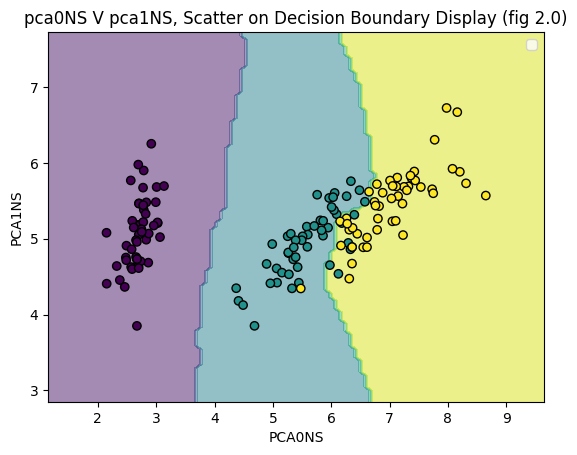

In [30]:
disp = DecisionBoundaryDisplay.from_estimator(
    clfpcaNS, XpcaNS, response_method="predict",
    xlabel="PCA0NS", ylabel="PCA1NS",
    alpha=0.5,
)
disp.ax_.scatter(XpcaNS['pca0NS'], XpcaNS['pca1NS'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('pca0NS V pca1NS, Scatter on Decision Boundary Display (fig 2.0)')
plt.show()

### Naive Bayesian


In [31]:
SumNB = 0
gnb = NB.GaussianNB()
for k in range(100):
    input_trainNB,input_testNB,output_trainNB,output_testNB = mod.train_test_split(x,Y,test_size=0.333)
    y_pred1 = gnb.fit(input_trainNB,output_trainNB).predict(input_testNB)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNB = SumNB + (output_testNB != y_pred1).sum()


NBRes = (((len(output_testNB)*100)-SumNB)/(len(output_testNB)*100))*100

print("Percenatge result of Naive Bayesian for petal and sepal length and width averaged over 100 runs and a test size of .333: " + str(NBRes) + " %")

Percenatge result of Naive Baysian for petal and sepal length and width averaged over 100 runs and a test size of .333: 95.02000000000001 %


In [32]:
xPetal = df_NoNA[['petal_length',  'petal_width']]
Y=df_NoNA['species']

SumNBP = 0
gnbP = NB.GaussianNB()
for k in range(100):
    input_trainNBP,input_testNBP,output_trainNBP,output_testNBP = mod.train_test_split(xPetal,Y,test_size=0.333)
    y_predP1 = gnbP.fit(input_trainNBP,output_trainNBP).predict(input_testNBP)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNBP = SumNBP + (output_testNBP != y_predP1).sum()


NBResP = (((len(output_testNBP)*100)-SumNBP)/(len(output_testNBP)*100))*100

print("Percenatge result of Naive Bayesian for petal length and width averaged over 100 runs and a test size of .333: " + str(NBResP) + " %")


Percenatge result of Naive Baysian for petal length and width averaged over 100 runs and a test size of .333: 95.86 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


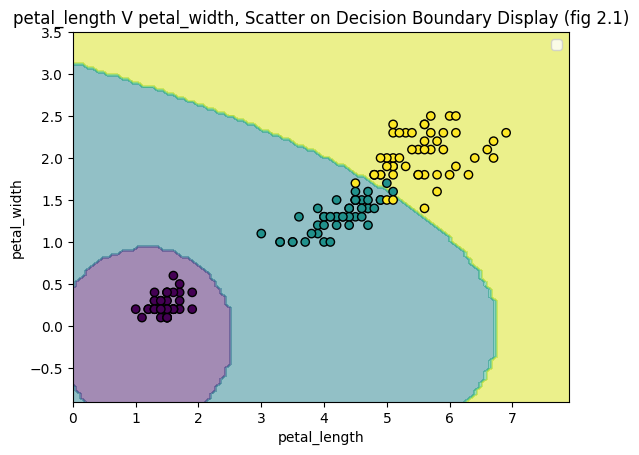

In [33]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnbP, xPetal, response_method="predict",
    xlabel="petal_length", ylabel="petal_width",
    alpha=0.5,
)
disp.ax_.scatter(xPetal['petal_length'], xPetal['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('petal_length V petal_width, Scatter on Decision Boundary Display (fig 2.1)')
plt.show()

In [34]:
xSepal = df_NoNA[['sepal_length',  'sepal_width']]
Y=df_NoNA['species']

SumNBS = 0
gnbS = NB.GaussianNB()
for k in range(100):
    input_trainNBS,input_testNBS,output_trainNBS,output_testNBS = mod.train_test_split(xSepal,Y,test_size=0.333)
    y_predS1 = gnbS.fit(input_trainNBS,output_trainNBS).predict(input_testNBS)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNBS = SumNBS + (output_testNBS != y_predS1).sum()


NBResS = (((len(output_testNBS)*100)-SumNBS)/(len(output_testNBS)*100))*100

print("Percenatge result of Naive Bayesian for sepal length and width averaged over 100 runs and a test size of .333: " + str(NBResS) + " %")

Percenatge result of Naive Baysian for sepal length and width averaged over 100 runs and a test size of .333: 77.66 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


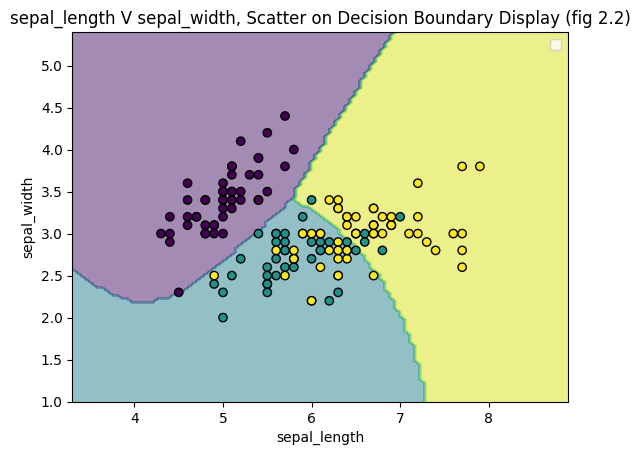

In [35]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnbS, xSepal, response_method="predict",
    xlabel="sepal_length", ylabel="sepal_width",
    alpha=0.5,
)
disp.ax_.scatter(xSepal['sepal_length'], xSepal['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('sepal_length V sepal_width, Scatter on Decision Boundary Display (fig 2.2)')
plt.show()

In [36]:
SumNBPCA = 0
gnbPCA = NB.GaussianNB()
for k in range(100):
    input_trainNBPCA,input_testNBPCA,output_trainNBPCA,output_testNBPCA = mod.train_test_split(XpcaNS,YpcaNS,test_size=0.333)
    y_pred2 = gnbPCA.fit(input_trainNBPCA,output_trainNBPCA).predict(input_testNBPCA)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNBPCA = SumNBPCA + (output_testNBPCA != y_pred2).sum()


NBResPCA = (((len(output_testNBPCA)*100)-SumNBPCA)/(len(output_testNBPCA)*100))*100

print("Percenatge result of Naive Bayesian with Non scaled principal component analysis applied averaged over 100 runs and a test size of .333: " + str(NBResPCA) + " %")

Percenatge result of Naive Baysian with Non scaled principal component analysis applied averaged over 100 runs and a test size of .333: 89.36 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


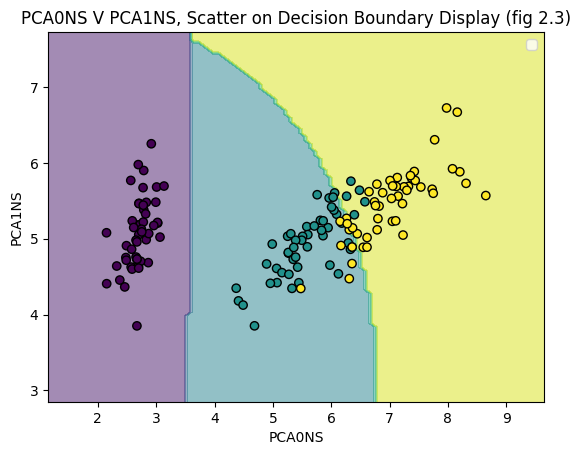

In [37]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnbPCA, XpcaNS, response_method="predict",
    xlabel="PCA0NS", ylabel="PCA1NS",
    alpha=0.5,
)
disp.ax_.scatter(XpcaNS['pca0NS'], XpcaNS['pca1NS'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('PCA0NS V PCA1NS, Scatter on Decision Boundary Display (fig 2.3)')
plt.show()

### J48 (Decision Tree Classification)

In [38]:
xPetal = df_NoNA[['petal_length',  'petal_width']]
Y=df_NoNA['species']
SumJ48P = 0

for x in range(100):
    input_trainJ48P,input_testJ48P,output_trainJ48P,output_testJ48P = mod.train_test_split(xPetal,Y,test_size=0.333)
    clf_entropy1 = DT.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
    clf_entropy1.fit(input_trainJ48P, output_trainJ48P)
    probP = clf_entropy1.predict(input_testJ48P)
    SumJ48P = SumJ48P + ((output_testJ48P != probP).sum())


J48ResP = (((len(output_testJ48P)*100)-SumJ48P)/(len(output_testJ48P)*100))*100

print("Percenatge result of J48 for petal length and width averaged over 100 runs with a test size of .333: " + str(J48ResP) + " %")

Percenatge result of J48 for petal length and width averaged over 100 runs with a test size of .333: 94.12 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


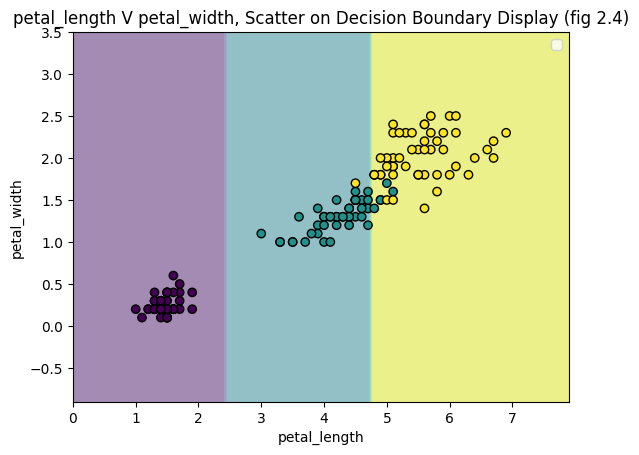

In [39]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf_entropy1, xPetal, response_method="predict",
    xlabel="petal_length", ylabel="petal_width",
    alpha=0.5,
)
disp.ax_.scatter(xPetal['petal_length'], xPetal['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('petal_length V petal_width, Scatter on Decision Boundary Display (fig 2.4)')
plt.show()

Text(0.5, 1.0, 'Decision Tree for petal length and Width (fig 2.5)')

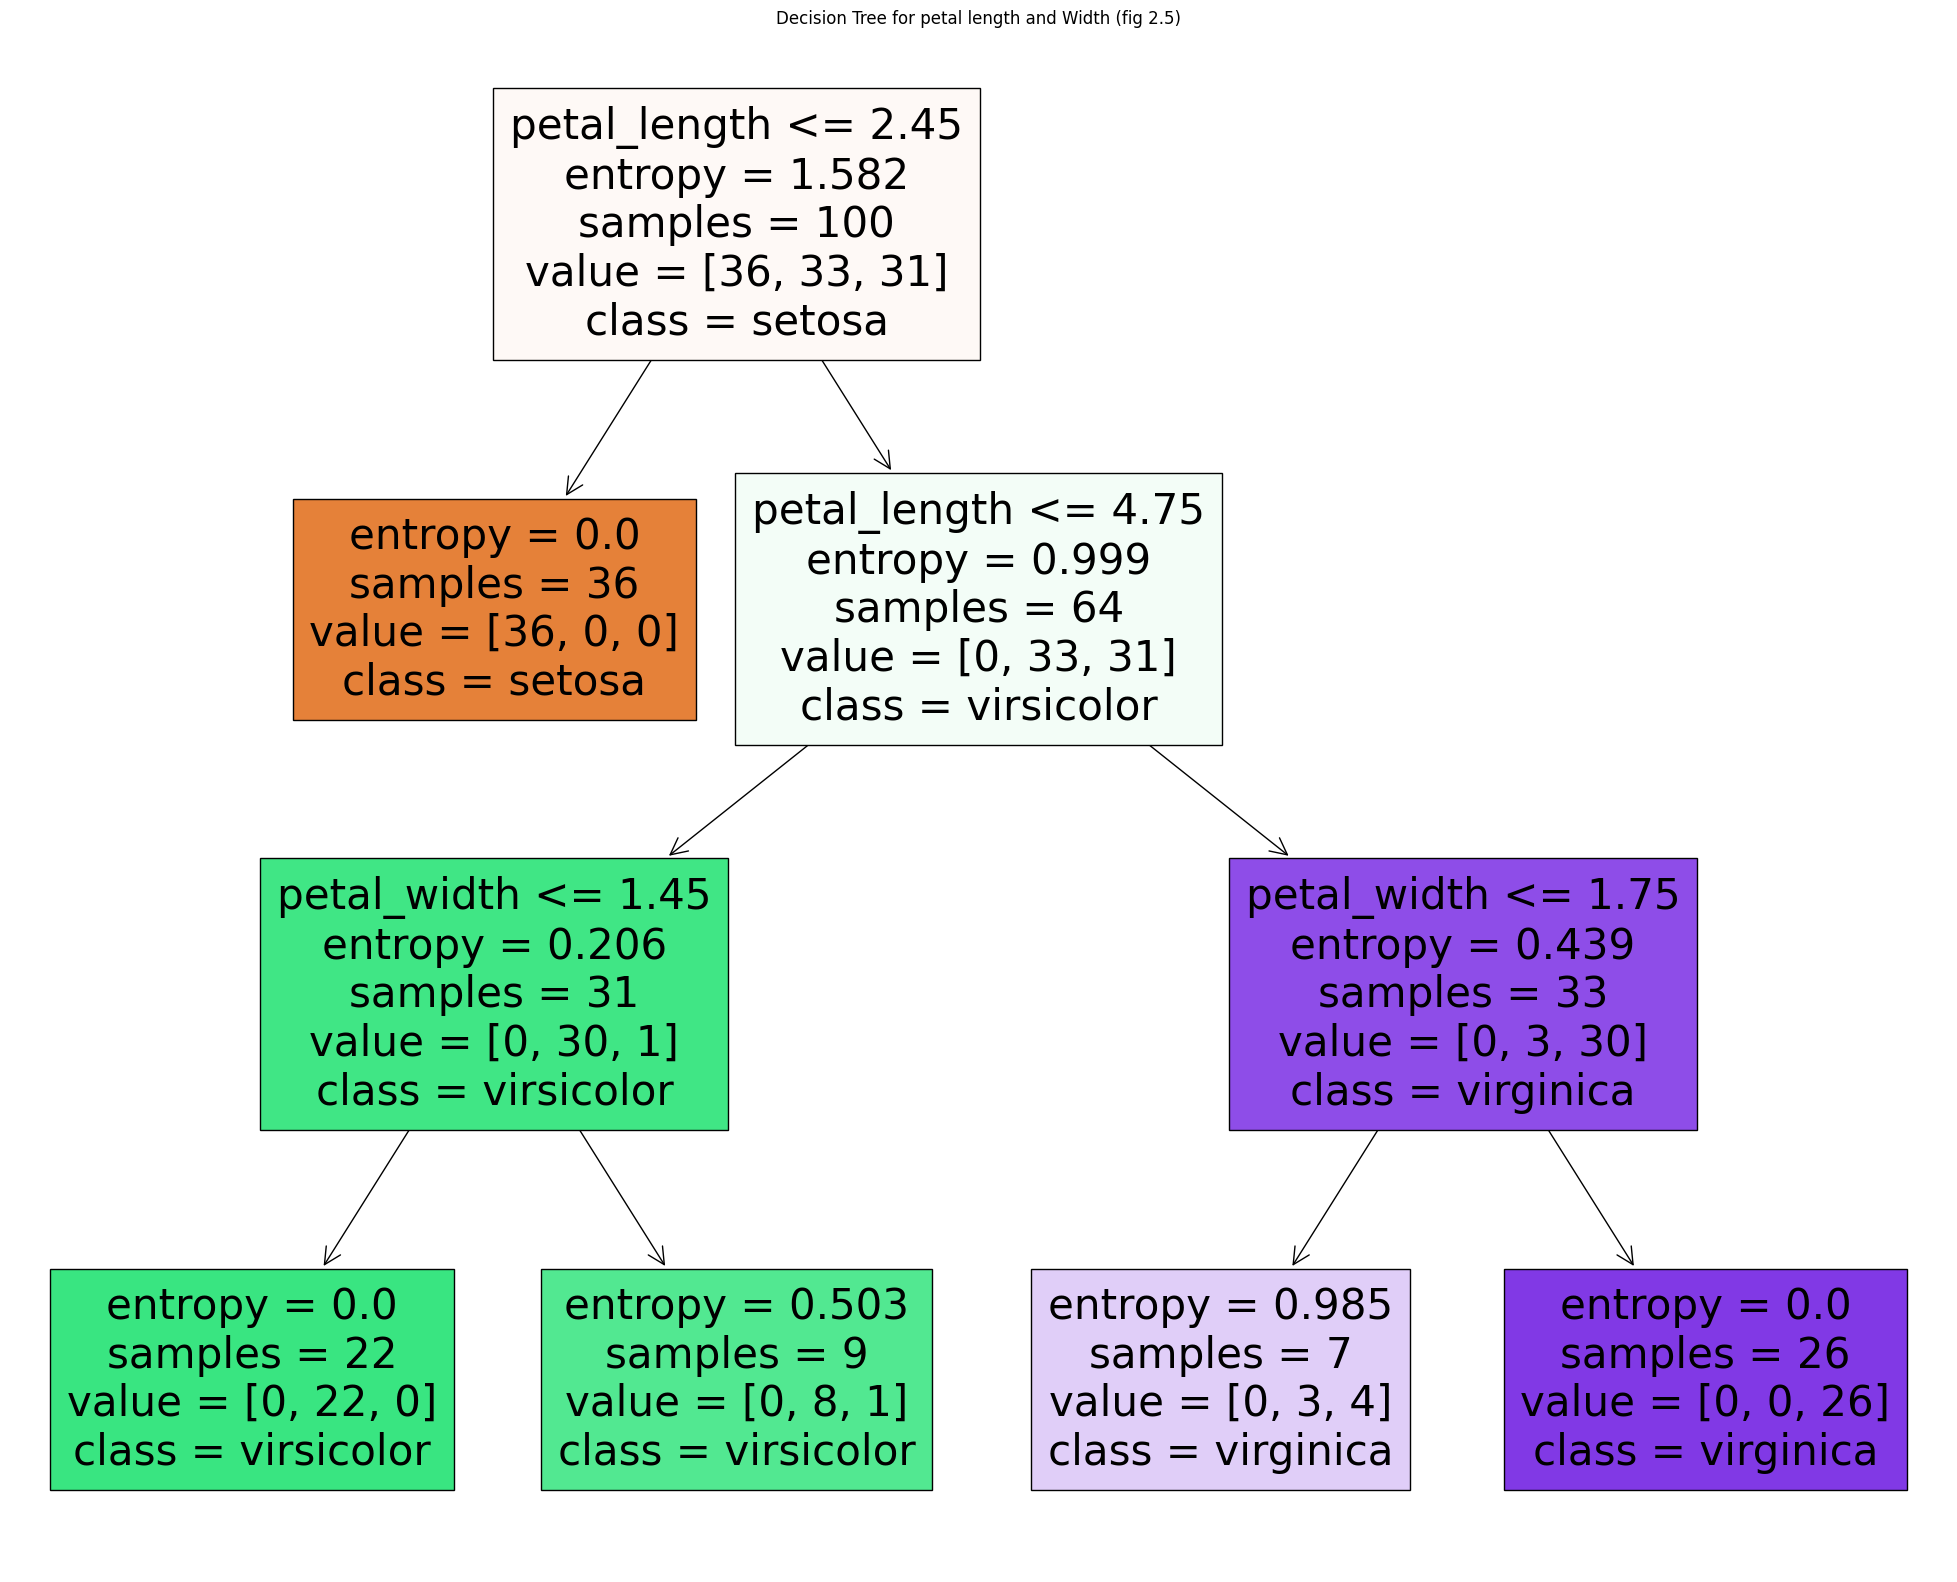

In [40]:
# https://mljar.com/blog/visualize-decision-tree/

fig = plt.figure(figsize=(25, 20))
_ = DT.plot_tree(clf_entropy1,
                 feature_names=['petal_length','petal_width'],
                 class_names=['setosa','virsicolor','virginica'],
                 filled=True)
plt.title('Decision Tree for petal length and Width (fig 2.5)')

In [41]:
xSepal = df_NoNA[['sepal_length',  'sepal_width']]
Y=df_NoNA['species']
SumJ48S = 0

for x in range(100):
    input_trainJ48S,input_testJ48S,output_trainJ48S,output_testJ48S = mod.train_test_split(xSepal,Y,test_size=0.333)
    clf_entropy2 = DT.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
    clf_entropy2.fit(input_trainJ48S, output_trainJ48S)
    probS = clf_entropy2.predict(input_testJ48S)
    SumJ48S = SumJ48S + ((output_testJ48S != probS).sum())


J48ResS = (((len(output_testJ48S)*100)-SumJ48S)/(len(output_testJ48S)*100))*100

print("Percenatge result of J48 for sepal length and width averaged over 100 runs with a test size of .333: " + str(J48ResS) + " %")

Percenatge result of J48 for sepal length and width averaged over 100 runs with a test size of .333: 69.89999999999999 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


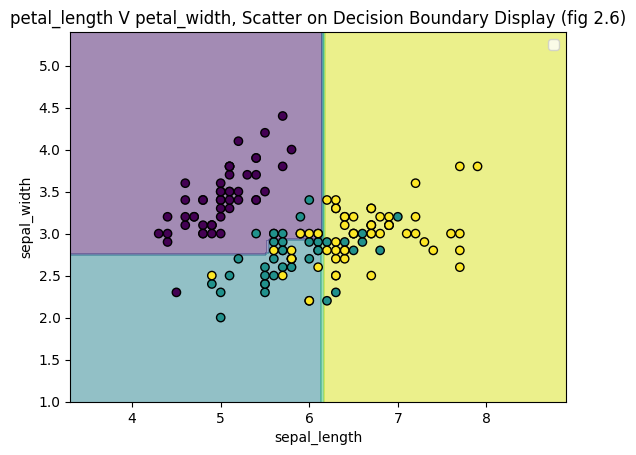

In [42]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf_entropy2, xSepal, response_method="predict",
    xlabel="sepal_length", ylabel="sepal_width",
    alpha=0.5,
)
disp.ax_.scatter(xSepal['sepal_length'], xSepal['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('petal_length V petal_width, Scatter on Decision Boundary Display (fig 2.6)')
plt.show()

Text(0.5, 1.0, 'Decision Tree for Sepal length and Width (fig 2.7)')

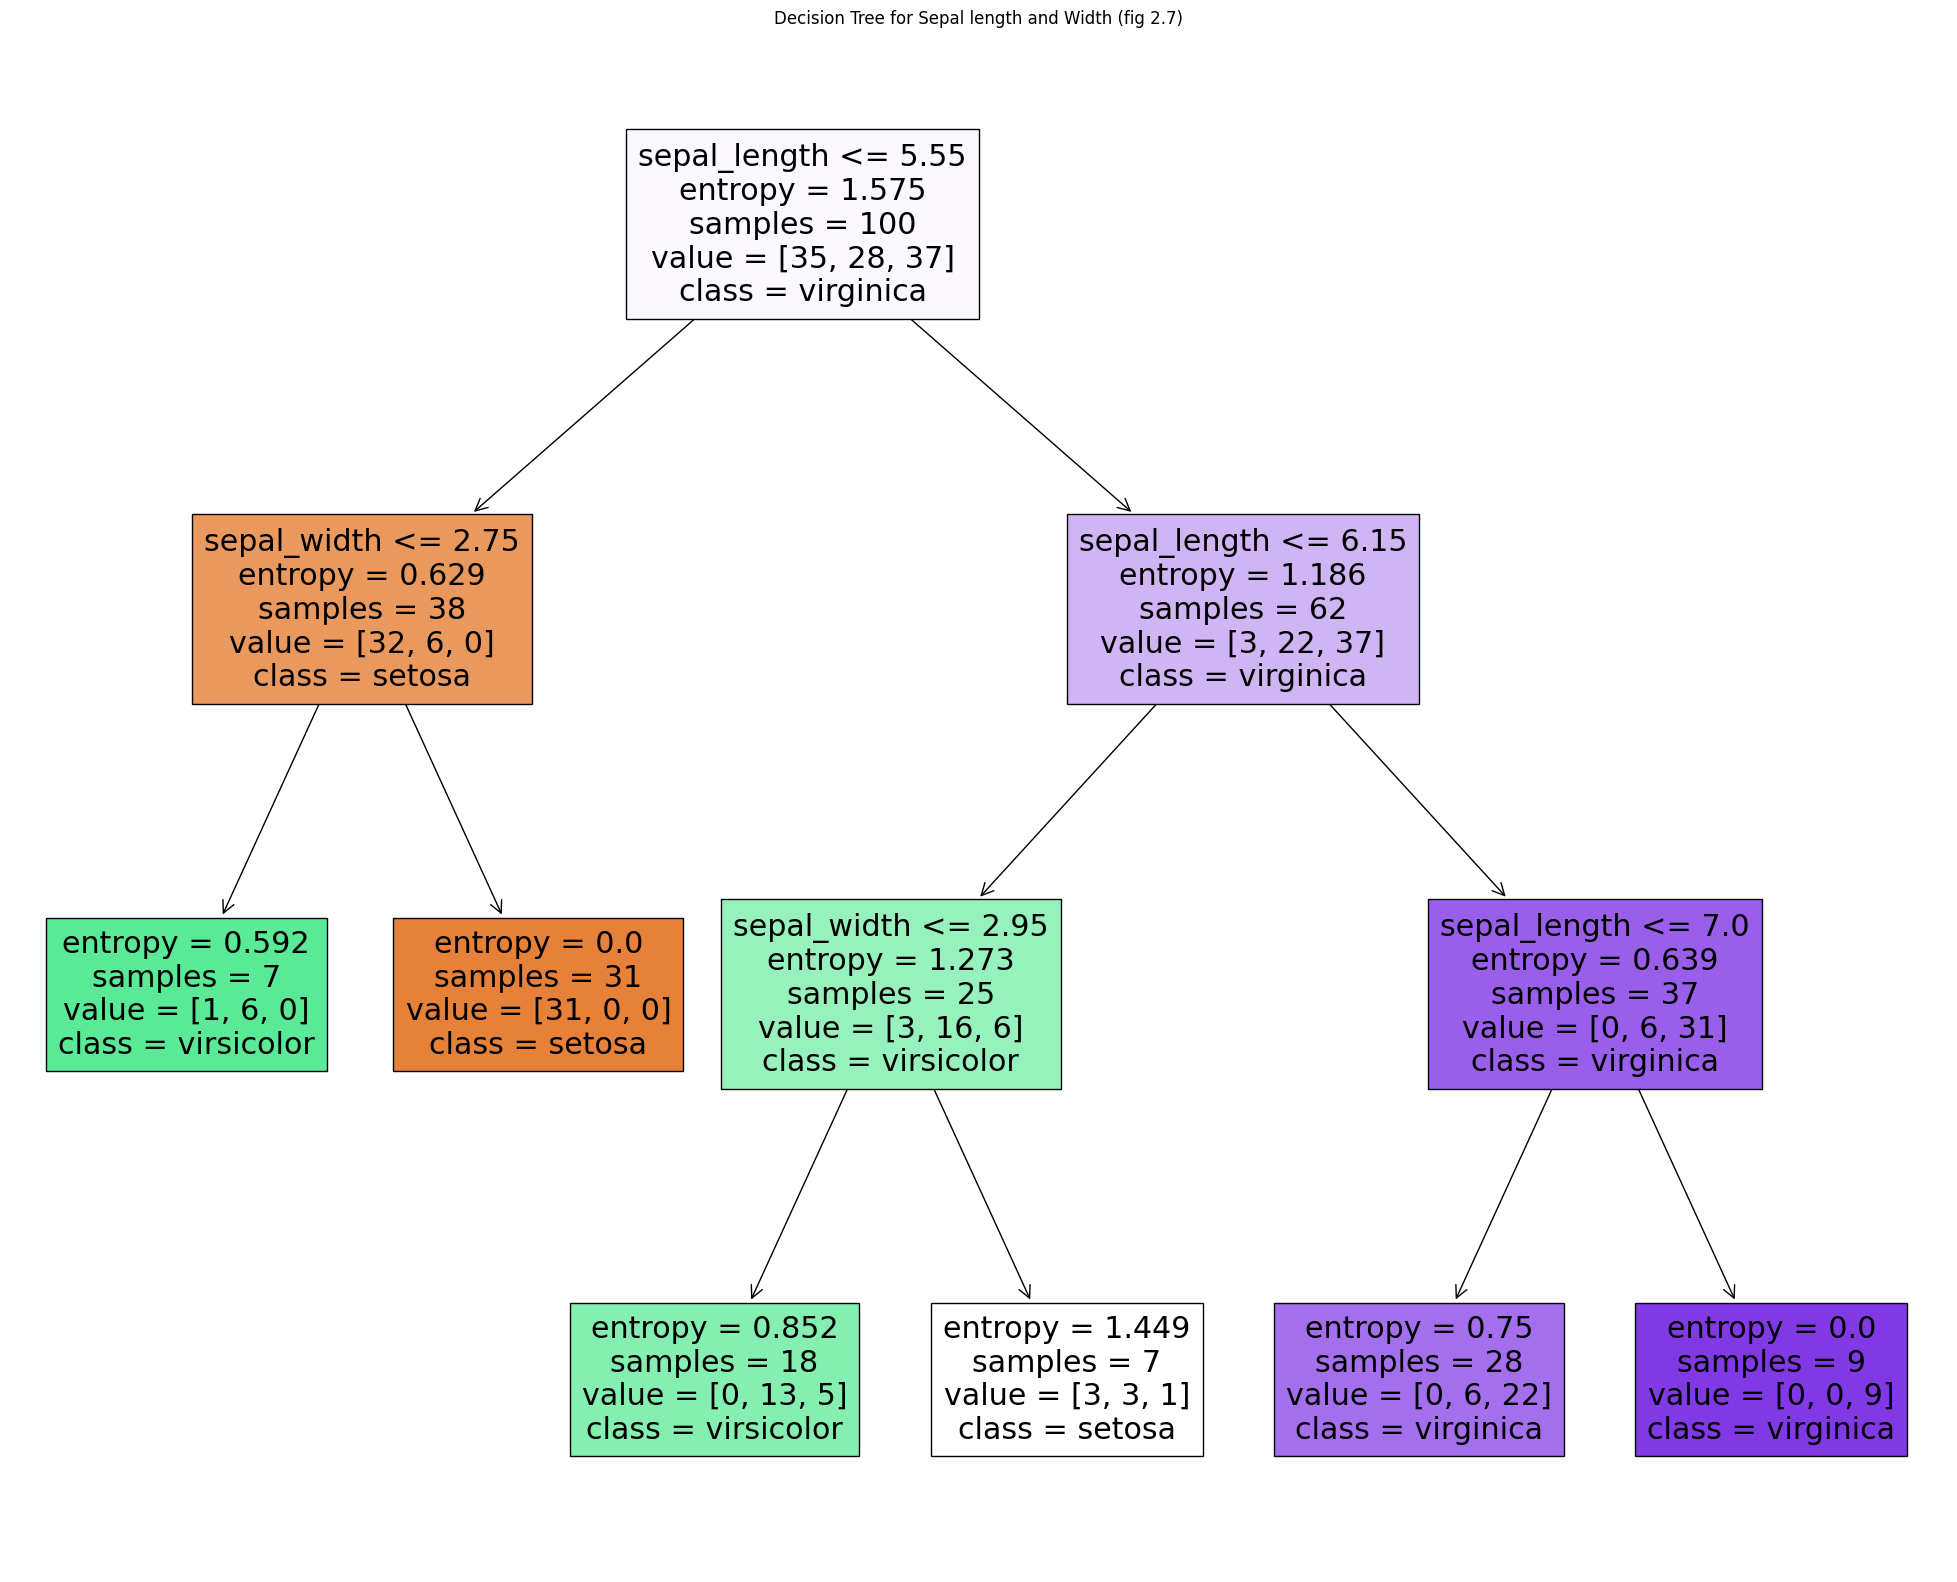

In [43]:
fig = plt.figure(figsize=(25, 20))
_ = DT.plot_tree(clf_entropy2,
                 feature_names=['sepal_length','sepal_width'],
                 class_names=['setosa','virsicolor','virginica'],
                 filled=True)
plt.title('Decision Tree for Sepal length and Width (fig 2.7)')

In [44]:
SumJ48PCA = 0

for x in range(100):
    input_trainJ48PCA,input_testJ48PCA,output_trainJ48PCA,output_testJ48PCA = mod.train_test_split(XpcaNS,YpcaNS,test_size=0.333)
    clf_entropy3 = DT.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
    clf_entropy3.fit(input_trainJ48PCA, output_trainJ48PCA)
    probPCA = clf_entropy3.predict(input_testJ48PCA)
    SumJ48PCA = SumJ48PCA + ((output_testJ48PCA != probPCA).sum())


J48ResPCA = (((len(output_testJ48PCA)*100)-SumJ48PCA)/(len(output_testJ48PCA)*100))*100

print("Percenatge result of J48 for all data points with non scaled principle component analysis applied averaged over 100 runs with a test size of .333: " + str(J48ResPCA) + " %")

Percenatge result of J48 for all data points with non scaled principle component analysis applied averaged over 100 runs with a test size of .333: 91.82000000000001 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


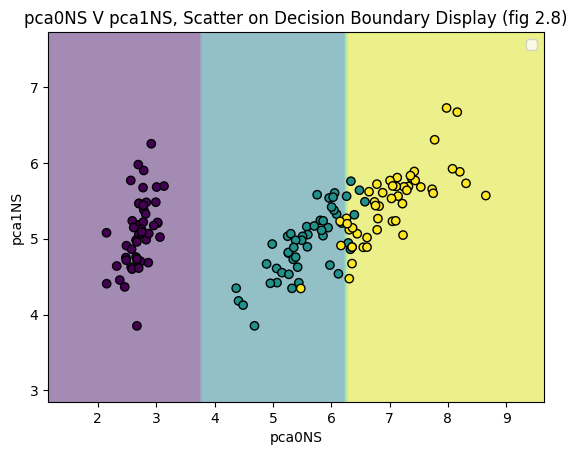

In [45]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf_entropy3, XpcaNS, response_method="predict",
    xlabel="pca0NS", ylabel="pca1NS",
    alpha=0.5,
)
disp.ax_.scatter(XpcaNS['pca0NS'],XpcaNS['pca1NS'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('pca0NS V pca1NS, Scatter on Decision Boundary Display (fig 2.8)')
plt.show()

Text(0.5, 1.0, 'Decision Tree for Principle component analysis variables (fig 2.9)')

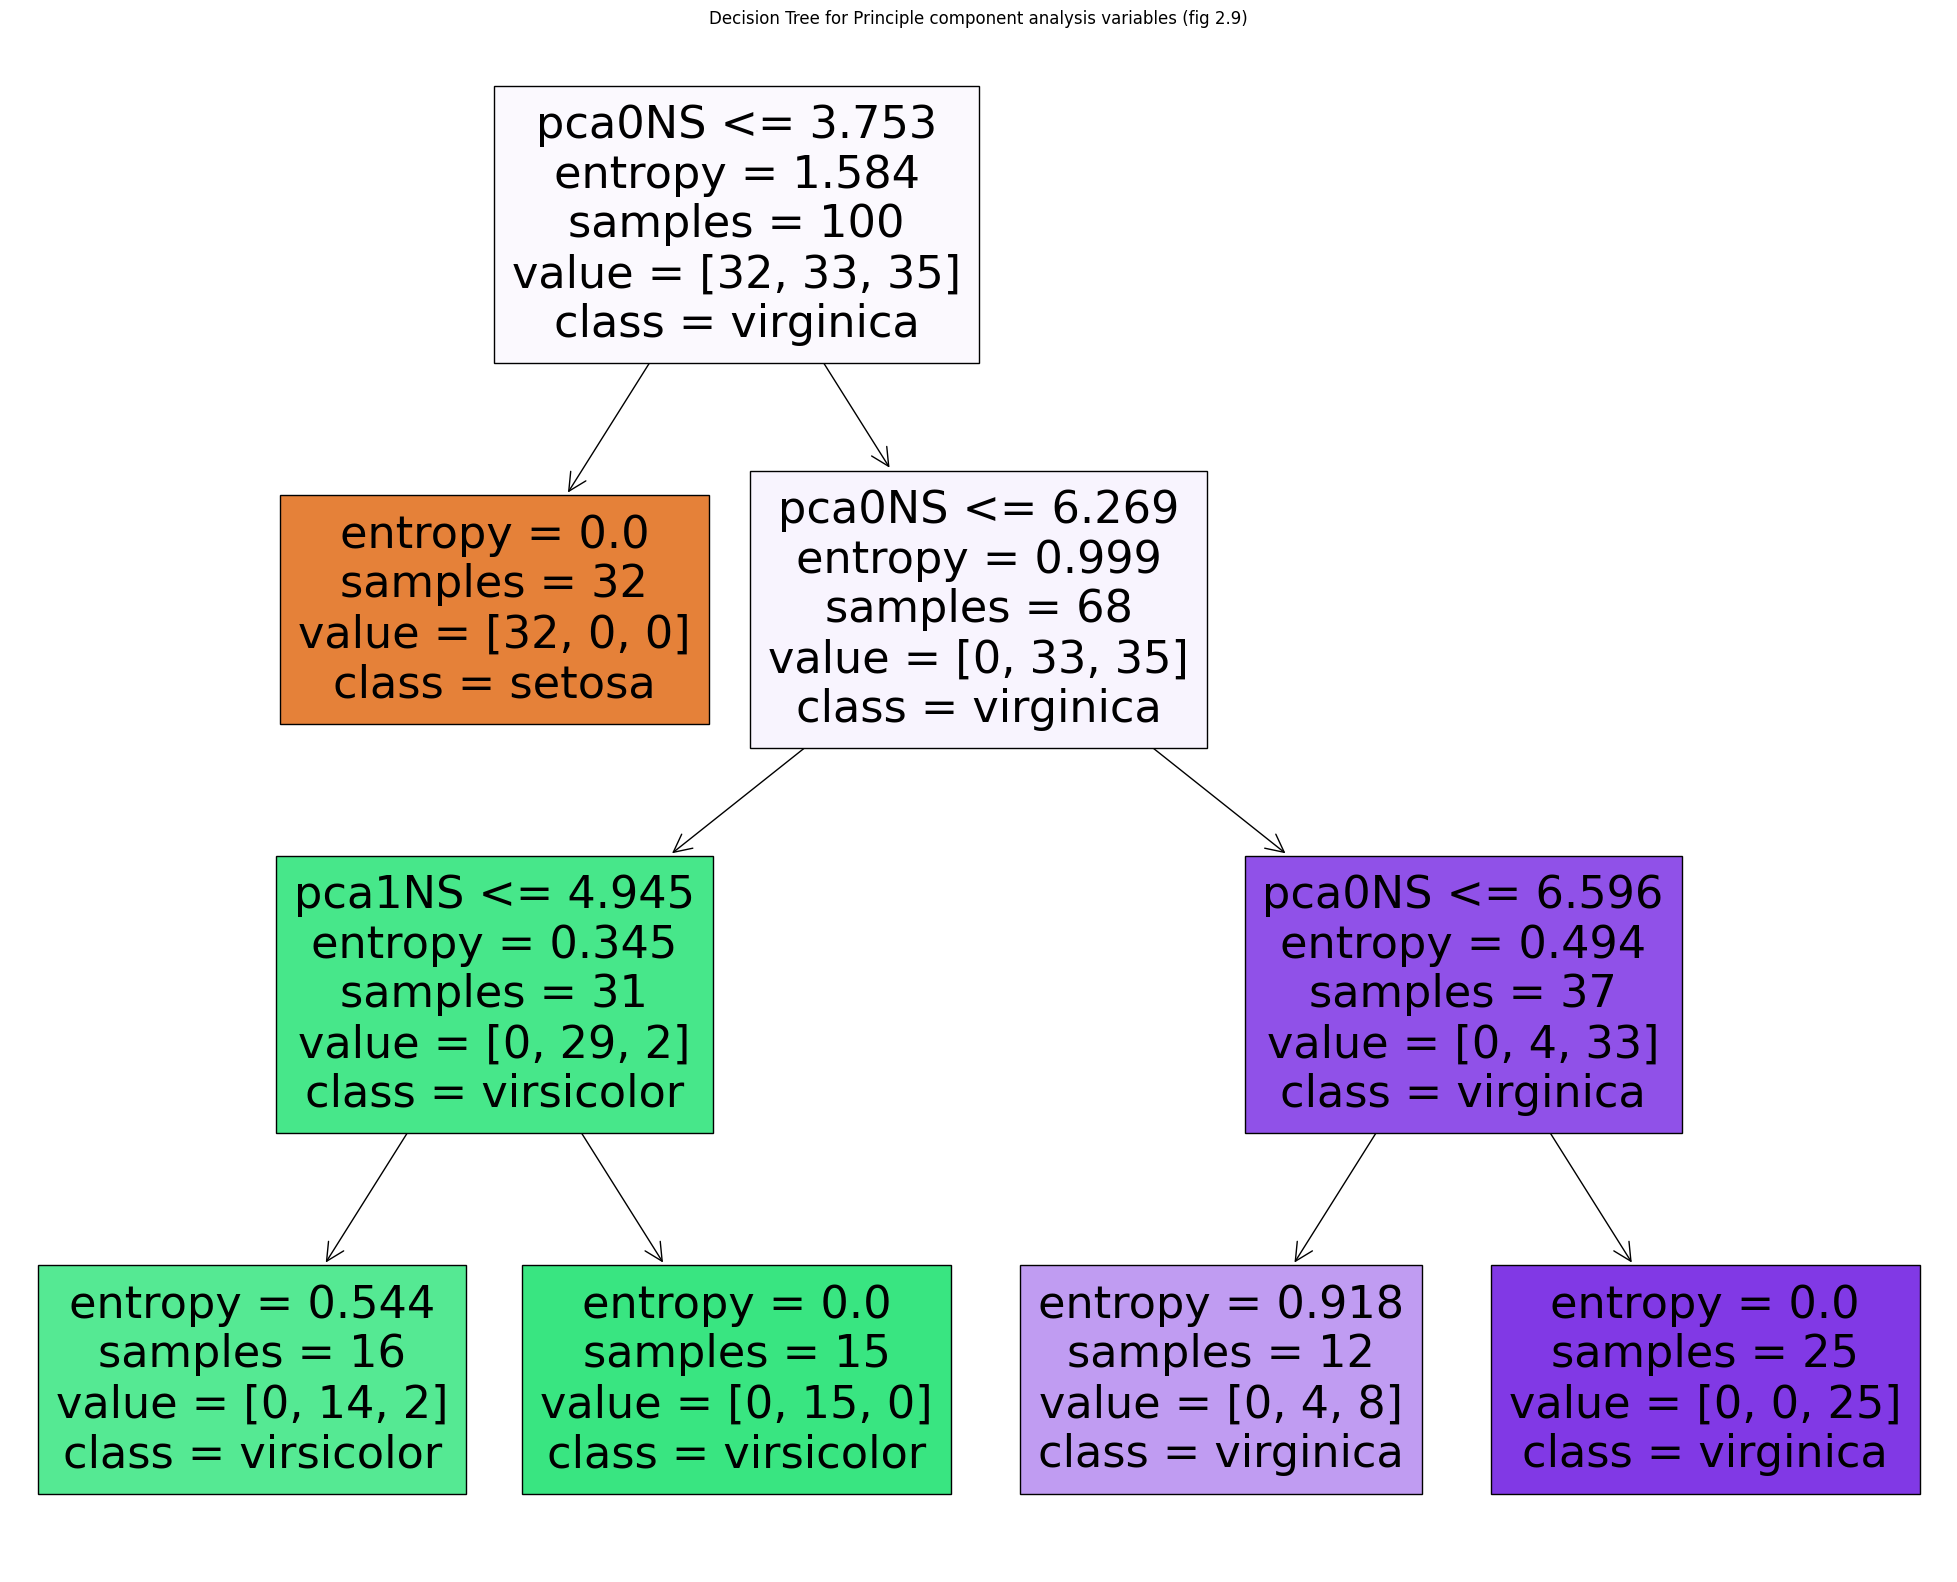

In [46]:
fig = plt.figure(figsize=(25, 20))
_ = DT.plot_tree(clf_entropy3,
                 feature_names=['pca0NS','pca1NS'],
                 class_names=['setosa','virsicolor','virginica'],
                 filled=True)
plt.title('Decision Tree for Principle component analysis variables (fig 2.9)')

### Results 

In the above exploration of classifiers, a misture of classifiers and data points were used. 
When completing the KNN classifiers initally, a scaled Princile componet analysis was included.
The difference between the variables was not so large that this was required, for the subsequent classifiers the scaled priniciple component analysis was excluded. 

From the inital histograms of the different sepieces it can be seen the most distinct, seperating values for the Iris plants was the petal length and widths. There was the least overlap in these variables, this would indicate these would be the variables to use for classification. 

#### K Nearest Neighbours
##### In the K nearest neighbours’ classifiers, averaged over 100 runs the results were as follows( At time of running):

KNN Sepal length and Width: 75.72 %

KNN Petal length and width: 96.32 %

KNN Scaled Principle Component Analysis of all 4 variables: 90.84 %

KNN Non Scaled Principle Component Analysis of all 4 variables: 90.84 %


#### Naive Bayesian
##### In the Naive Bayesian classifiers, averaged over 100 runs the results were as follows:

Naive Bayesian for petal and sepal length and width: 95.02%

Naive Bayesian for petal length and width: 95.86 %

Naive Bayesian for sepal length and width: 77.66 %

Non Scaled Principle Component Analysis of all 4 variables: 89.36%


#### J48 (Decision Tree Classification)
##### In the J48 (Decision Tree Classification) classifiers, averaged over 100 runs the results were as follows:

J48 petal length and width: 94.12 %

J48 Sepal length and width: 69.9%

J48 Non Scaled Principle Component Analysis of all 4 variables: 91.82 %



### Discussion:

Across all classifiers the best performing variables was solely the petal length and width.
Followed closely by the Non scaled principle component analysis of all 4 variables.

Scaling the variables was deemed unnecessary as there was no single variable that far out weighed the other variables in magnitude, so the scaling was not required to allow the principle component analysis to perform well. 

The initial assumption that the petal length and width was the best variables to train the classifiers on has seemed to be true, with these classifiers performing the best overall. 

All three classifiers performed reasonably well, K nearest neighbours did preform the best overall giving the highest percentage of correctly classified test values at 96.32% at the time of running, rerunning the notebook will add a slight variation to the results depending on the values that are falling in to the test and train variables in the classifiers. 

I used mostly scatter plots plotted over the decision boundary graphs to display how each classifier classifies the data points into the respective classes. 
I also included decision trees for the J48 classifier as it is interesting to visualise where the decisions to classify the data are put in place. 


#### Conclusion 
The three used techniques to explore the Iris data set are easily implemented and offer reasonable results. One classifier slightly out-performed the other two, K nearest neighbour classifier using the petal length and width as feature to train the model on offering a successful test rate of 96.32 %

The variables that offered the most successful models in each classifier were petal length and width. 
These two variables consistently returned the best test cases for all classifiers used. 
This was predicted early in the report on an initial review of the variables using histograms to visualise how the different species overlap.

The Iris data set does not benefit from scaling the data, as all values are in a similar magnitude. 
On the instance the data was scaled there was no apparent benefit, there the scaling was not implemented for other classifiers. 
